In [19]:
import osmnx as ox
import networkx as nx

from shapely.geometry import Point
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
L = ox.graph_from_place('Lüneburg, Germany', 
    network_type='drive_service', simplify=False)

In [21]:
# obtaining bus stops coordinates in the same area
bus_stops = ox.geometries_from_place('Lüneburg, Germany', {'highway':"bus_stop"})
bus_points = bus_stops[bus_stops.geom_type == "Point"]

# dropping duplicate bus stops
unique_stops = bus_points.drop_duplicates(subset=['name'])
unique_stops['n_node'] = ox.distance.nearest_nodes(L, unique_stops.geometry.x, unique_stops.geometry.y)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [22]:
bus_ids = unique_stops['n_node']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


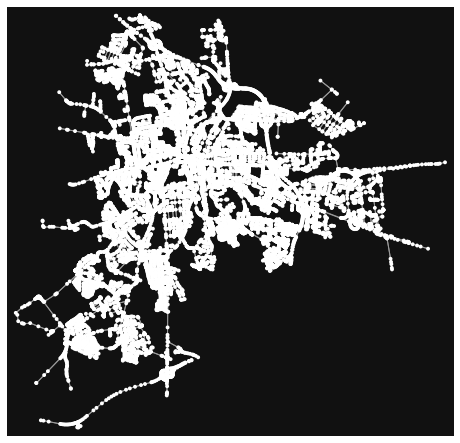

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [23]:
ox.plot_graph(L)

In [24]:
distance_matrix = np.zeros(shape=(len(bus_ids),len(bus_ids)))
for i in range(0,len(bus_ids)):
    for j in range(0,len(bus_ids)):
        distance_matrix[i,j]=nx.shortest_path_length(L, bus_ids[i], bus_ids[j], weight='length')

dm = pd.DataFrame(distance_matrix, columns=unique_stops['name'])
dm = dm.set_index(unique_stops['name'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


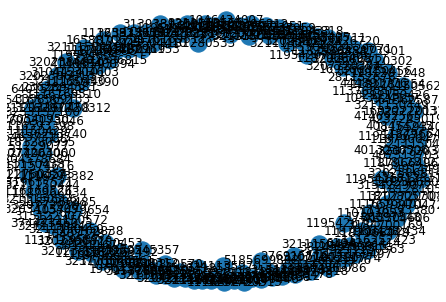

In [32]:
# consequently connected graph (with shortest paths)

P = nx.Graph()
P.add_nodes_from(bus_ids)
nx.draw(P, with_labels=True)

In [33]:
def connect_sparse_graph(P, L):
    for n1 in list(P.nodes()):
        for n2 in list(P.nodes()):
            rules = [n1!=n2,
                     any(x in list(P.nodes()) for x in nx.shortest_path(L, n1, n2)[1:-1]) == False
                    ]
            if all(rules):
                P.add_edge(n1, n2, length=nx.shortest_path_length(L, n1, n2, weight="length"))
    return P

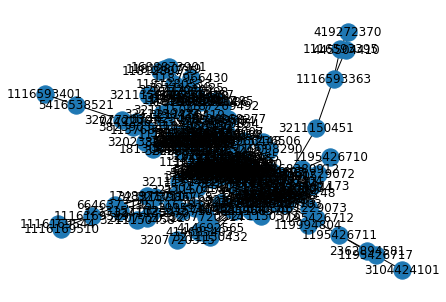

In [34]:
connect_sparse_graph(P, L) # you can start from 1 and see how the graph grows
nx.draw(P, with_labels=True)

In [43]:
sparse_matrix_lueneburg = pd.DataFrame(nx.adjacency_matrix(P, weight='length').todense(), columns=unique_stops['name'])
sparse_matrix_lueneburg = sparse_matrix_lueneburg.set_index(unique_stops['name'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
sparse_matrix_lueneburg

name,Universitätsallee,Bei Mönchsgarten,Hermann-Löns-Straße,Wilhelm-Leuschner-Straße,Graf-von-Moltke-Straße,St.-Stephanus-Platz,Konrad-Adenauer-Straße,Waldfriedhof,Schäferfeld,Kurt-Schumacher-Straße,...,An der Roten Bleiche (Universität),Feldstraße (Universität),GHS Kreideberg,Herderschule,Spechtsweg,Kanalbrücke,Veilchenring,NaN,Tartuer Platz,Konrad-Adenauer-Straße Ost
name,,,,,,,,,,,,,,,,,,,,,
Universitätsallee,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,...,1135.252,0.000,0.0,0.0,1137.682,0.000,0.0,0.000,0.000,0.000
Bei Mönchsgarten,0.0,0.0,0.000,0.000,0.000,0.000,4161.069,0.0,3976.428,0.0,...,0.000,2819.509,0.0,0.0,0.000,0.000,0.0,3366.100,0.000,0.000
Hermann-Löns-Straße,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.000,5128.829,0.0,653.322,2020.208,4619.527
Wilhelm-Leuschner-Straße,0.0,0.0,0.000,0.000,413.237,0.000,0.000,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000
Graf-von-Moltke-Straße,0.0,0.0,0.000,413.237,0.000,283.255,0.000,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kanalbrücke,0.0,0.0,5128.829,0.000,0.000,0.000,0.000,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,4080.316
Veilchenring,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.0,...,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000
NaN,0.0,3366.1,653.322,0.000,0.000,0.000,4046.694,0.0,3862.053,0.0,...,0.000,2877.410,0.0,0.0,4263.860,0.000,0.0,0.000,0.000,0.000


In [46]:
sparse_matrix_lueneburg.to_csv('sparse_matrix_lueneburg.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


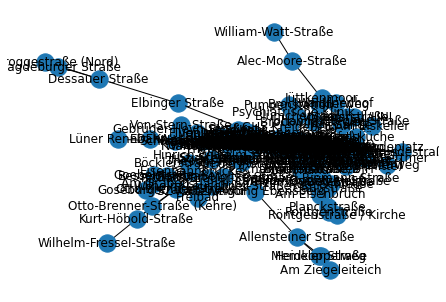

In [45]:
# drawing with labels
V = nx.from_pandas_adjacency(sparse_matrix_lueneburg)
nx.draw(V, with_labels = True)